# PROJETO EDA- ANÁLISES DE EVASÃO DE CARTÃO DE CRÉDITOS
### DATA 02/10/23

## INTRODUÇÃO

Para que uma empresa tenha sucesso no mercado competitivo,  a evasão do consumidor,é caracterizado com um problema sério. Toada e qualquer organização para se manter lucrativa, precisa identificar possíveis clientes que podem ou poderá sair de sua carteira,provocando perca de receitas e de faturamentos, Pensando nisso, o conceito de churn de clientes, é  fundamental para o planejamento estratégico e o bom desempenho da gestão nas corporações.Sendo assim,O churn, também chamado churn rate, é um índice que mede a taxa de cancelamento, isto é, indica a porcentagem da evasão dos consumidores em uma determinada empresa. Sendo assim, o churn rate está associado a casos em que um cliente deixa de utilizar um produto ou serviço, quantificando o número total de usuários cancelados na jornada de consumo.

## OBJETIVO

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

In [39]:
# Biblioteca para verificação de memórioa
!pip install psutil


In [40]:

import psutil

# Função para obter informações sobre o uso de memória em MB
def obter_informacoes_memoria():
    mem = psutil.virtual_memory()
    total_mb = mem.total / (1024 ** 2)  # Convertendo de bytes para MB
    available_mb = mem.available / (1024 ** 2)  # Convertendo de bytes para MB
    print(f"Uso de memória total: {total_mb:.2f} MB")
    print(f"Uso de memória disponível: {available_mb:.2f} MB")
    print(f"Percentual de uso de memória: {mem.percent:.2f}%")

# Seu código aqui...

# Chame a função para obter informações sobre o uso de memória após a execução do seu código
obter_informacoes_memoria()



Uso de memória total: 8013.99 MB
Uso de memória disponível: 1889.65 MB
Percentual de uso de memória: 76.40%


In [41]:
#immportando bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

#renderizando
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'jpeg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [42]:
#pio.renderers.default = "png" # visualizar e salvar em foto para git
#pio.renderers.default = "notebook" # visualizar em outra IDE
pio.renderers.default ='jpeg'# visualizar em outra IDE

In [43]:
# Visualizando base de dados

tabela = pd.read_csv("cancelamentos.csv")
tabela = tabela.drop("CustomerID", axis=1)
display(tabela)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Aqui se percebe que a base de dados já veio com pré tratamento nas variáveis , e que nos facitou o trabalho

In [44]:
# buscando informação dos dados
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881663 non-null  float64
 3   frequencia_uso          881663 non-null  float64
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881661 non-null  object 
 7   duracao_contrato        881663 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


In [45]:
#verificação de dados nulos
tabela.isnull().mean()  

idade                     0.000002
sexo                      0.000002
tempo_como_cliente        0.000003
frequencia_uso            0.000003
ligacoes_callcenter       0.000002
dias_atraso               0.000002
assinatura                0.000006
duracao_contrato          0.000003
total_gasto               0.000002
meses_ultima_interacao    0.000002
cancelou                  0.000002
dtype: float64

Existem em todas as colunas valores nulos,principalmente na variável que no indica a TARGET, por ser valores muitos pequenos de missing, adotou-se a estratégia de excluir todas as colunas, porém. nem sempre essa será uma boa estratégia, o ideal é buscar os motivos dos missings, ou adotar uma estratégia estatística.

In [46]:
# excluindo todas os missing e verificando novamentes
tabela=tabela.dropna()    # excluindo valores nulos
tabela.isnull().mean()

idade                     0.0
sexo                      0.0
tempo_como_cliente        0.0
frequencia_uso            0.0
ligacoes_callcenter       0.0
dias_atraso               0.0
assinatura                0.0
duracao_contrato          0.0
total_gasto               0.0
meses_ultima_interacao    0.0
cancelou                  0.0
dtype: float64

## Quantas pessoas cancelaram o serviço?

In [47]:
# aqui observou que ('1.0' cancelou o serviço) e ('0' não cancelou o serviço)
display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

1.0    499993
0.0    381666
Name: cancelou, dtype: int64

1.0    56.7%
0.0    43.3%
Name: cancelou, dtype: object

Mais da metade dos clientes 56,7%, cancelram o serviço, temos um problema séria a resolver

## Vamos observar como está a duração dos contratos?

In [48]:
display(tabela["duracao_contrato"].value_counts(normalize=True))
display(tabela["duracao_contrato"].value_counts())

Annual       0.401964
Quarterly    0.400448
Monthly      0.197588
Name: duracao_contrato, dtype: float64

Annual       354395
Quarterly    353059
Monthly      174205
Name: duracao_contrato, dtype: int64

Os contratos MENSAIS são os que menos duram, os mais ruins.

In [49]:
# analisando o contrato mensal
display(tabela.groupby("duracao_contrato").mean(numeric_only=True))
# descobrimos aqui que a média de cancelamentos é 1, ou seja, praticamente todos os contratos mensais cancelaram (ou todos)

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
duracao_contrato,,,,,,,,
Annual,38.842165,31.446186,15.880213,3.263401,12.465156,651.697738,14.236107,0.460760
Monthly,41.552407,30.538555,15.499274,4.985649,15.007267,550.616435,15.478012,1.000000
Quarterly,38.830938,31.419916,15.886662,3.265245,12.460863,651.427783,14.234544,0.460255


Aqui descobrimos que todos cancelamento mensais é 1, ou seja, todos cancelam o serviços

## Já que descobrimos que todos contratos mensais cancelam, vamos analisar apenas os não mensais

In [50]:
# então descobrimos que contrato mensal é ruim, vamos tirar ele e continuar analisando
tabela = tabela[tabela["duracao_contrato"]!="Monthly"]
display(tabela)
display(tabela["cancelou"].value_counts())
display(tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format))

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
5,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.00,8.0,1.0
6,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.00,24.0,1.0
7,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.00,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


0.0    381666
1.0    325788
Name: cancelou, dtype: int64

0.0    53.9%
1.0    46.1%
Name: cancelou, dtype: object

Aqui já percebemos que houve uma melhora de 56,7 % dos clientes total que cancelaram para 46,1%

## Vamos ver como se comportam as assinaturas dos clientes

In [51]:
# chegamos agora em menos da metade de pessoas cancelando, mas ainda temos muitas pessoas ai, vamos continuar analisando
display(tabela["assinatura"].value_counts(normalize=True))
display(tabela.groupby("assinatura").mean(numeric_only=True))
# vemos que assinatura é quase 1/3, 1/3, 1/3
# e que os cancelamentos são na média bem parecidos, então fica difícil tirar alguma conclusão da média, vamos precisar ir mais a fundo

Standard    0.339648
Premium     0.338138
Basic       0.322215
Name: assinatura, dtype: float64

,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
assinatura,,,,,,,,
Basic,38.904813,32.316031,15.876921,3.310021,12.507054,648.642614,14.240814,0.475188
Premium,38.817814,30.977869,15.889673,3.235886,12.433427,653.337633,14.231150,0.452338
Standard,38.790478,31.048621,15.883393,3.249275,12.450690,652.566793,14.234280,0.454714


As assinaturas não impactam nos cancelamento, mas iremos analisar graficamente

## Vamos analisar se as idades inteferem nos cancelamentos

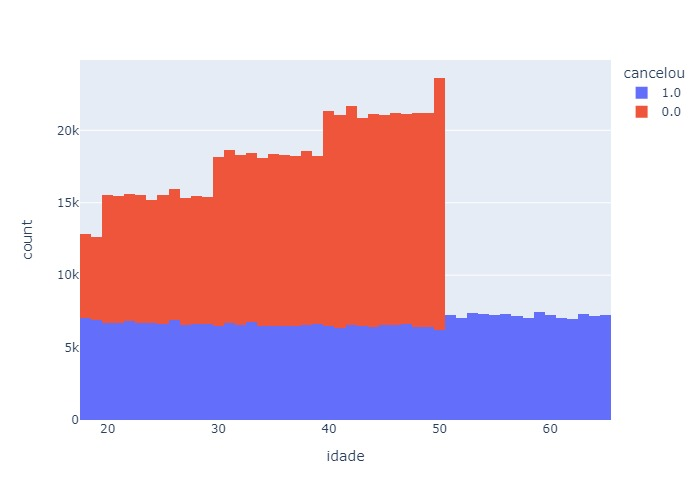

In [52]:
    grafico = px.histogram(tabela, x="idade", color="cancelou")
    grafico.show()


Aqui verificamos que todos cliente acima de 50 anos cancelam o cartão,porém existe clientes que cancelam o cartaão comenos idade

## Aqui vamos verificar apenas os menores de 50 anos

In [53]:
menore_50=tabela[ tabela['idade']<=50 ]
menore_50

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
8,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.00,13.0,1.0
10,29.0,Male,18.0,9.0,0.0,30.0,Premium,Quarterly,930.00,18.0,1.0
12,22.0,Male,41.0,17.0,10.0,25.0,Basic,Quarterly,265.00,23.0,1.0
13,48.0,Female,35.0,25.0,1.0,13.0,Basic,Annual,518.00,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


## Aqui são os menores de 50 anos agrupados por sexo

In [54]:
# Aqui são os menores de 50 anos agrupados por sexo
menore_50.groupby(['sexo'])['cancelou'].value_counts(normalize=True)

sexo    cancelou
Female  0.0         0.529033
        1.0         0.470967
Male    0.0         0.709230
        1.0         0.290770
Name: cancelou, dtype: float64

Dos menos de 50 anos,47% são do sexo feminino

In [55]:
# buscando sexo feminino menores que 50 e que cancelou o serviço
#feminino = menore_50[(menore_50['sexo'] == 'Female') & (menore_50['cancelou'] != 1.0)]

#feminino

## Ao perceber que 47% dos clientes femininos menores de 50 anos cancelam o serviço, será interessante verificar o que relamente está causando o problema nesse público alvo!

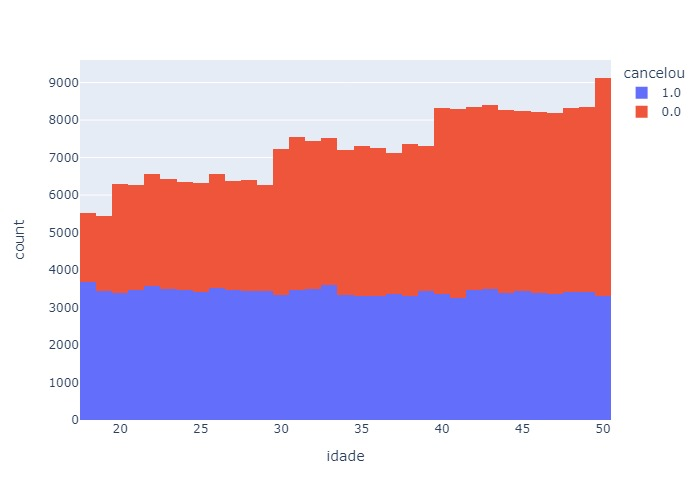

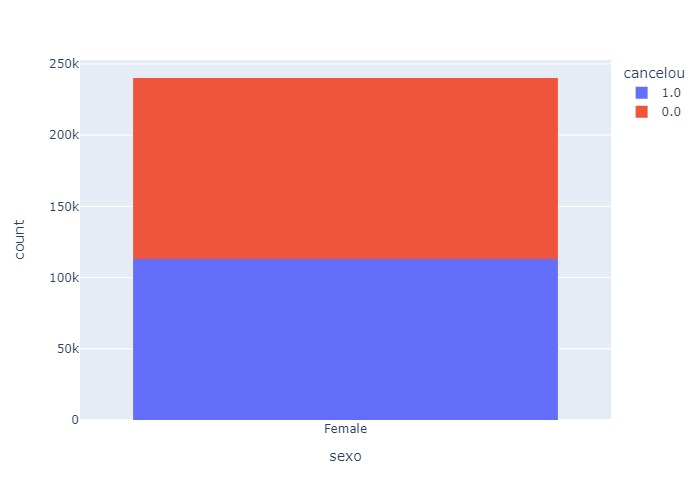

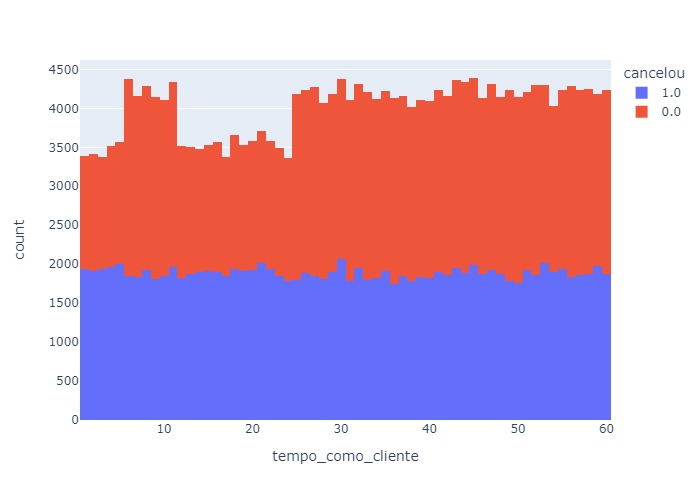

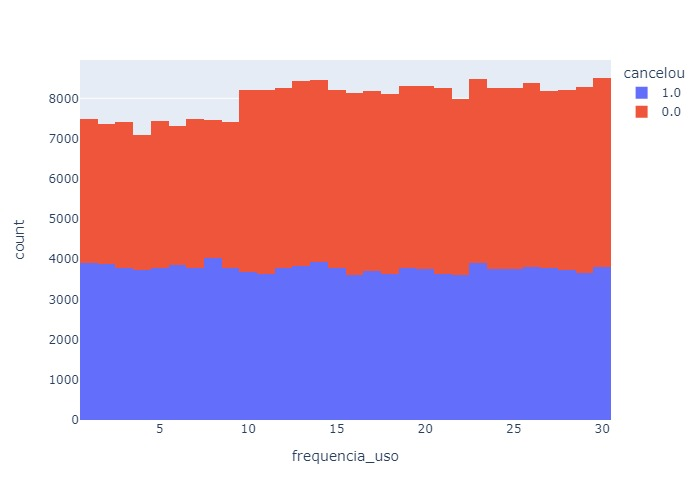

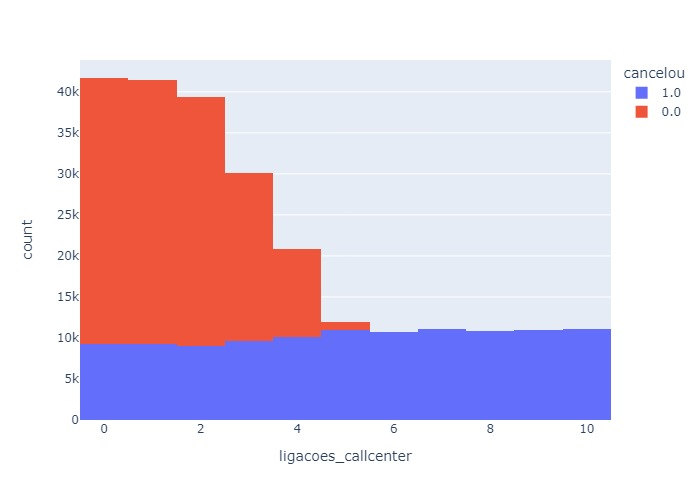

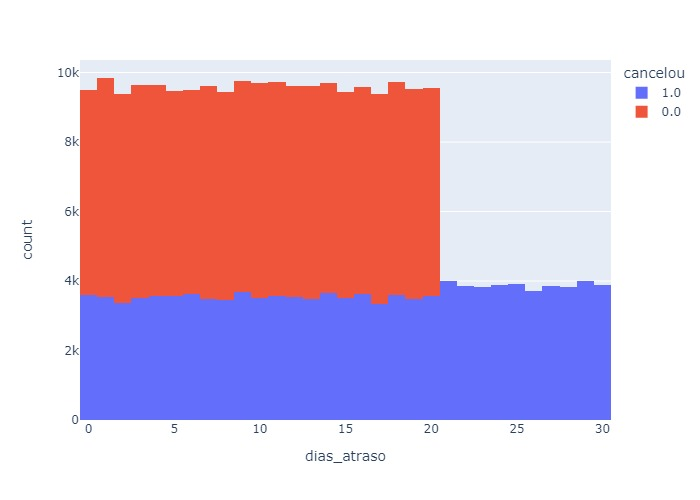

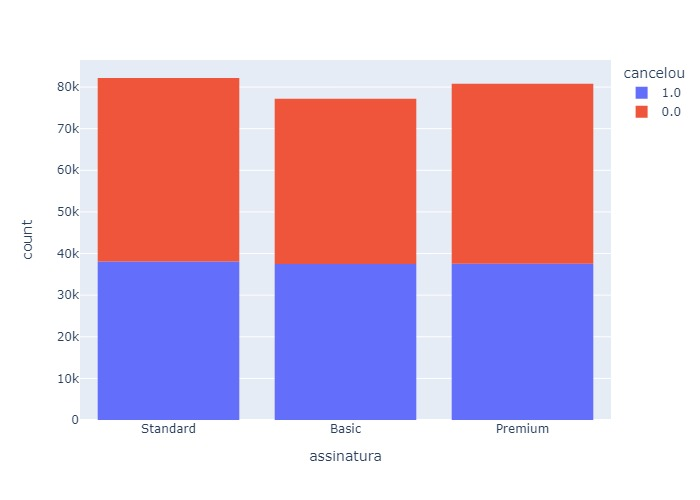

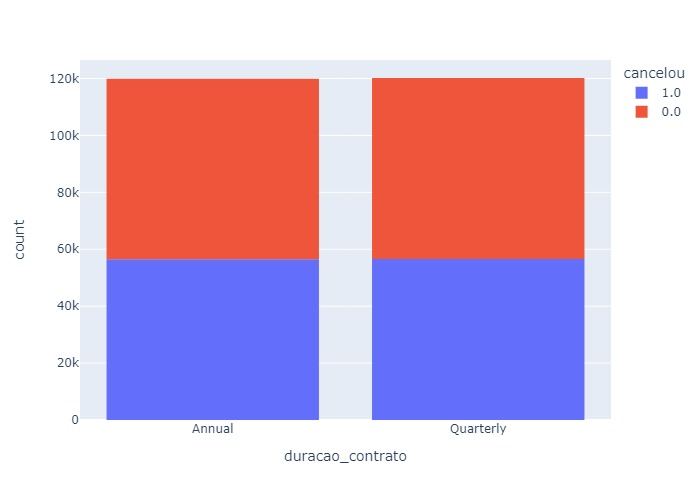

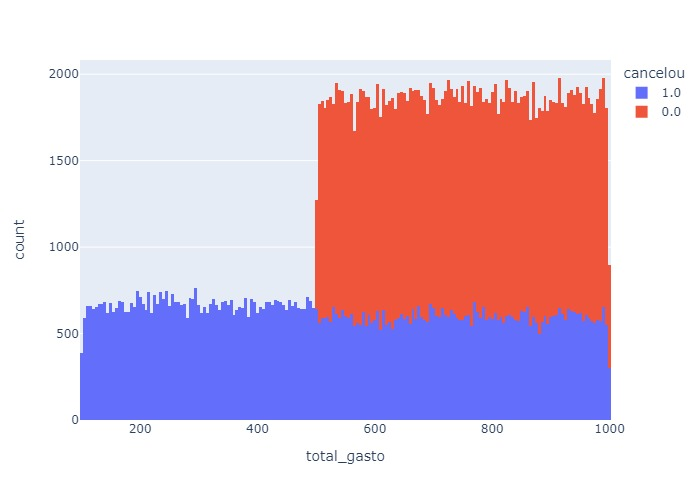

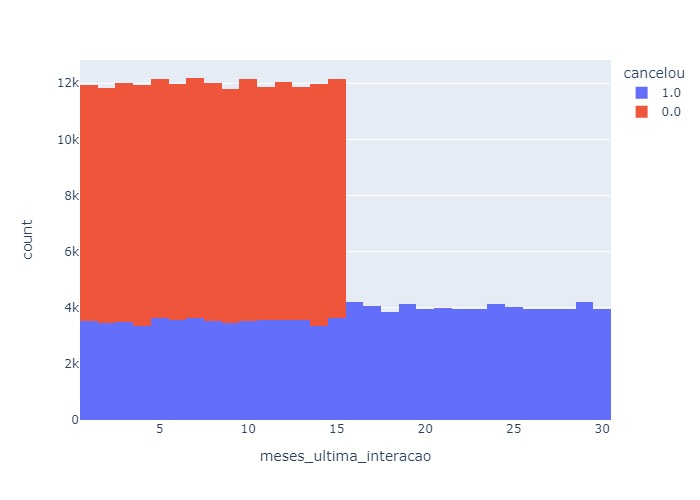

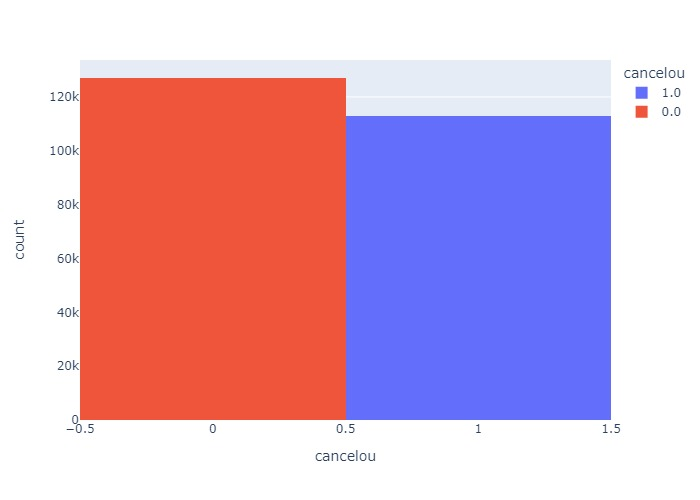

In [56]:
    feminino = menore_50[(menore_50['sexo'] == 'Female')]    
    for coluna in tabela.columns:
        grafico = px.histogram(feminino, x=coluna, color="cancelou")
        grafico.show()

## Vamos observar a base inteira para validar as hipóteses

- Do femininos menos de 50 anos fez mais de 5 ligações 
- Têm mais de 20 dias de atraso 
- gasta menos de 500 reais 
- Tem acima de 15 meses de interação

## Vamos observar somente os femininos menores de 50 que cancelou o serviço

In [57]:
feminino = menore_50[(menore_50['sexo'] == 'Female') & (menore_50['cancelou'] != 1.0)]
feminino

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
135,36.0,Female,5.0,6.0,0.0,6.0,Premium,Quarterly,787.00,9.0,0.0
187,32.0,Female,35.0,9.0,1.0,15.0,Premium,Quarterly,951.00,4.0,0.0
201,42.0,Female,58.0,1.0,3.0,10.0,Standard,Quarterly,733.00,2.0,0.0
234,34.0,Female,20.0,29.0,0.0,4.0,Basic,Annual,580.00,4.0,0.0
436,40.0,Female,42.0,5.0,1.0,19.0,Premium,Annual,696.00,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
881646,32.0,Female,31.0,23.0,3.0,11.0,Premium,Annual,947.18,8.0,0.0
881648,44.0,Female,45.0,3.0,3.0,13.0,Basic,Annual,776.12,12.0,0.0
881650,44.0,Female,11.0,18.0,2.0,15.0,Basic,Quarterly,837.97,8.0,0.0
881651,50.0,Female,36.0,28.0,3.0,13.0,Standard,Quarterly,990.21,4.0,0.0


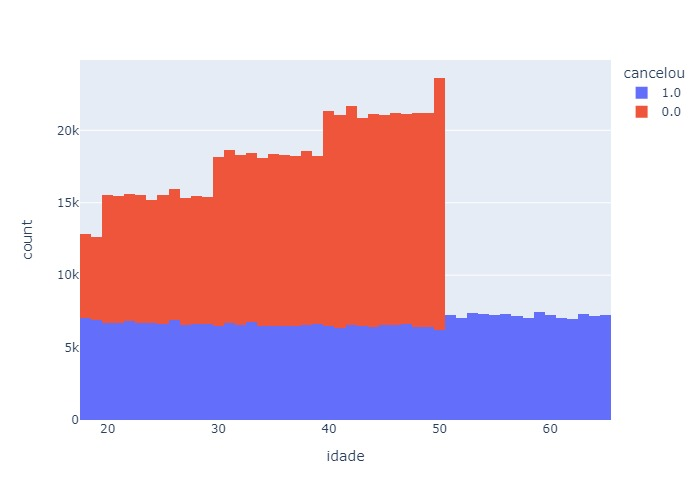

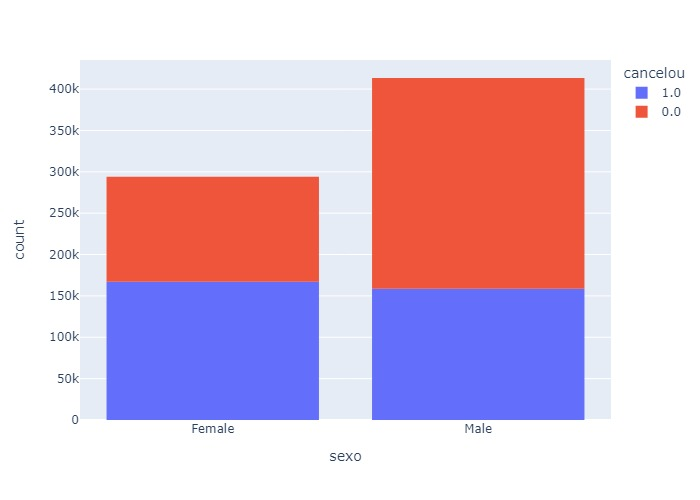

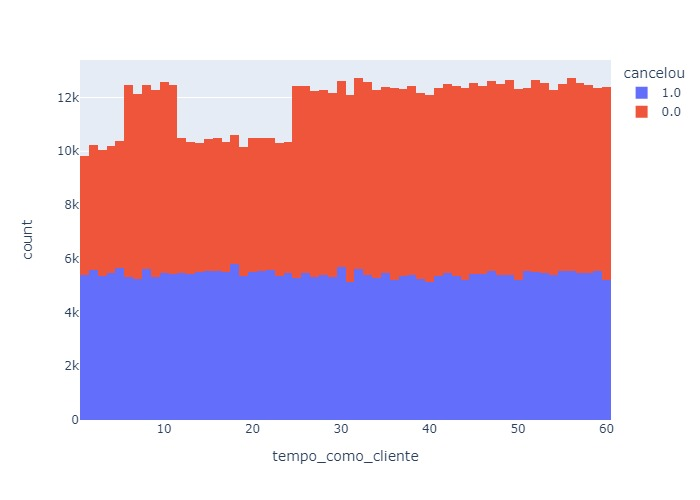

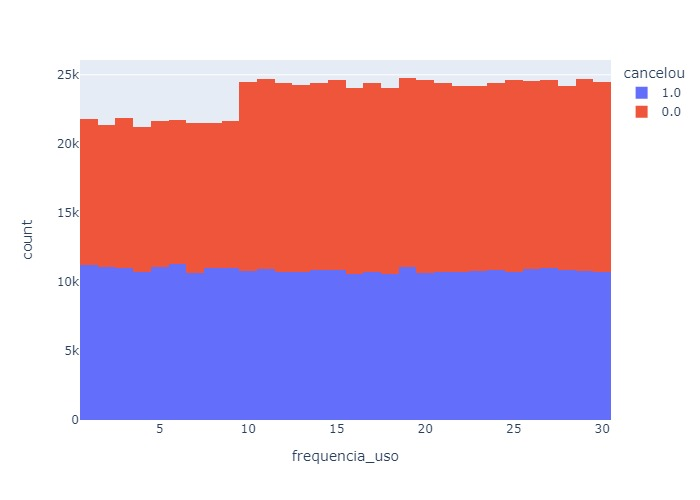

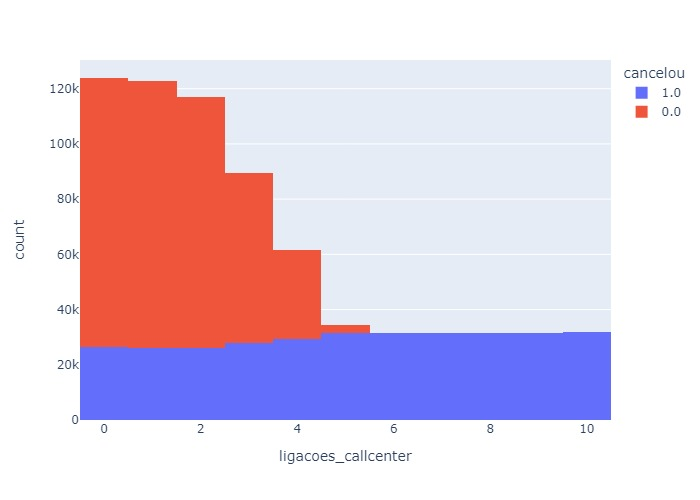

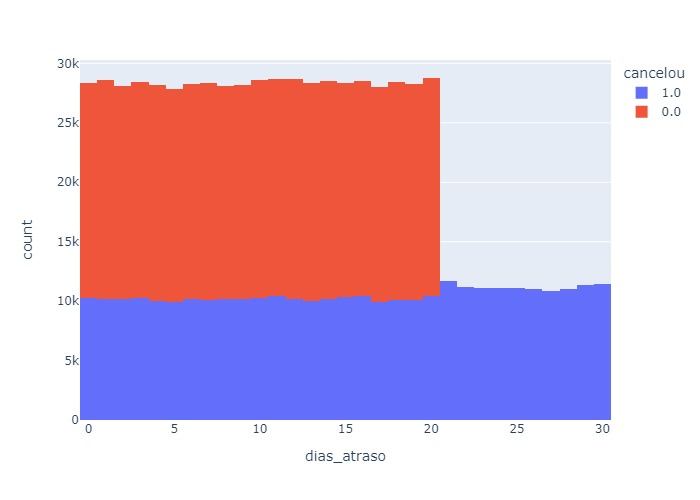

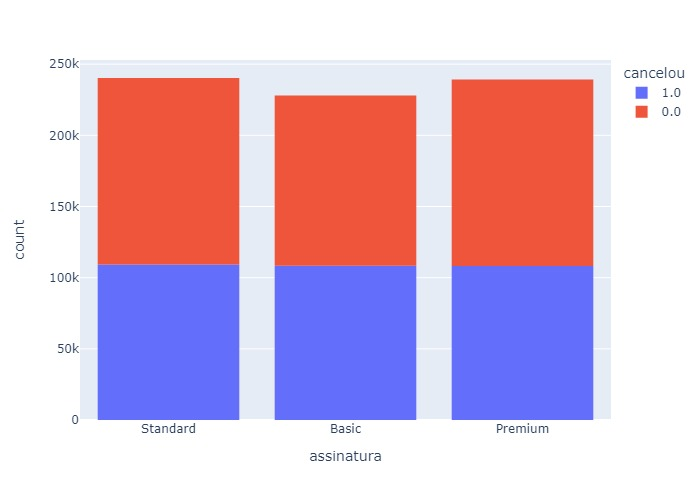

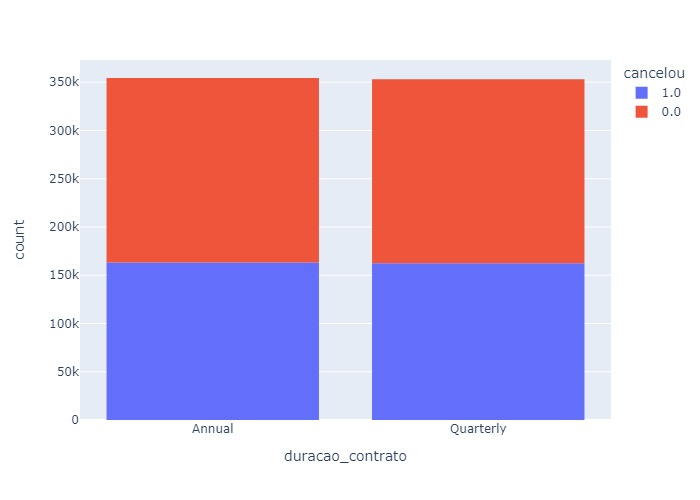

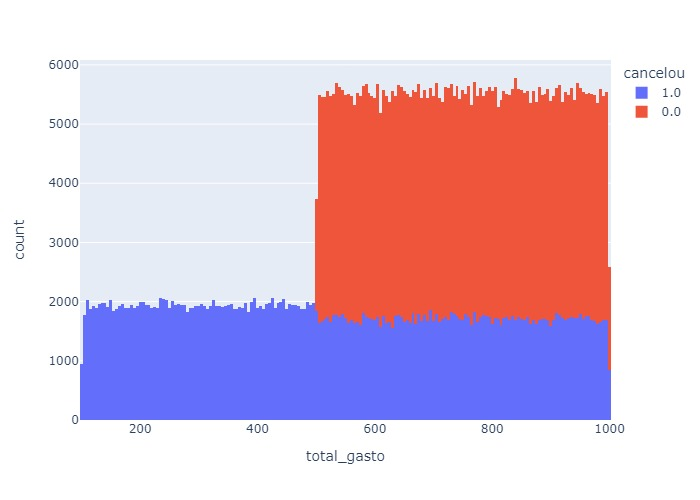

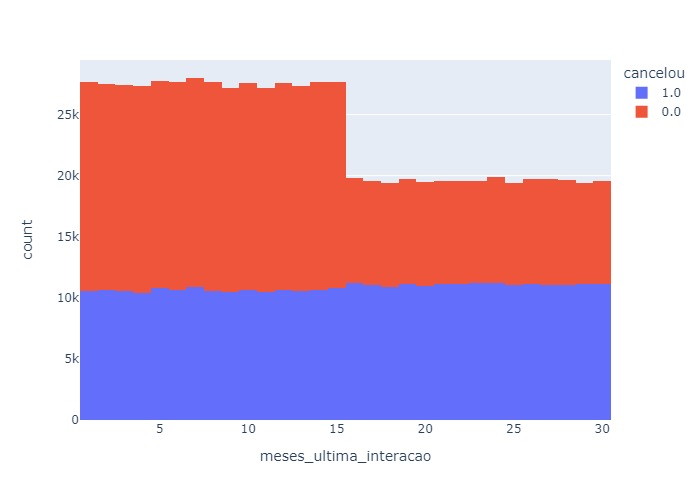

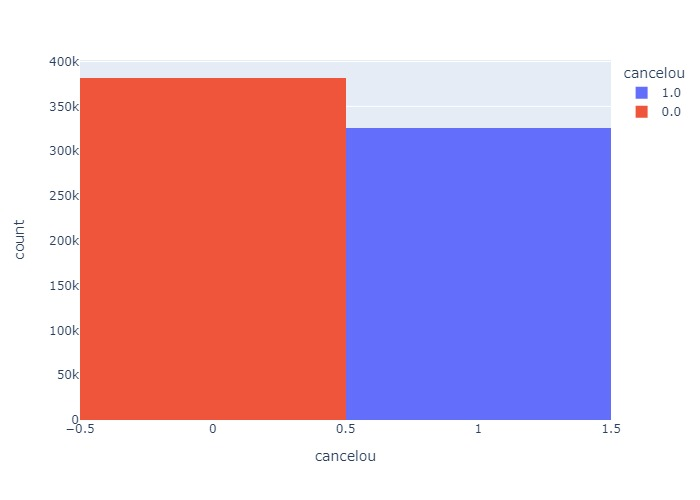

In [58]:
    for coluna in tabela.columns:
            grafico = px.histogram(tabela, x=coluna, color="cancelou")
            grafico.show()

# PRINCIPAIS RESULTADOS

- Todos acima de 50 anos cancelaram o cartão
- Olhando a base toda o sexo não interfere nos cancelamentos, mas ao olhar os menos de 50 anos, a maioria dos cancelamentos são do sexo feminino
- Acima de 5 ligação os clientes cancelam o cartão
- Clientes com gasto abaixo de 500 reais todos cancelaram o cartão, mas existem  cancelamentos acima desse valor
- Os meses de interação fez diferença ao publico feminino com idade menores de 50 anos que cancelaram o cartão

# SUGESTÕES DE ACÕES CORRETIVAS

- Definir estratégias de marketing segmentados para público acima de 50 anos e abaixo de 50 anos priorizando públicos femininos mais jovens
- Melhorar o call center, pois ele é um fator de diferencial para os clientes
- Definir estratégia de fidelização de clientes com base nos gasto do cartão de créditos
- Criar estratégias com base nas interações do cliente com menos de 50 anos.

In [59]:
obter_informacoes_memoria()

Uso de memória total: 8013.99 MB
Uso de memória disponível: 1554.83 MB
Percentual de uso de memória: 80.60%
